In [2]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

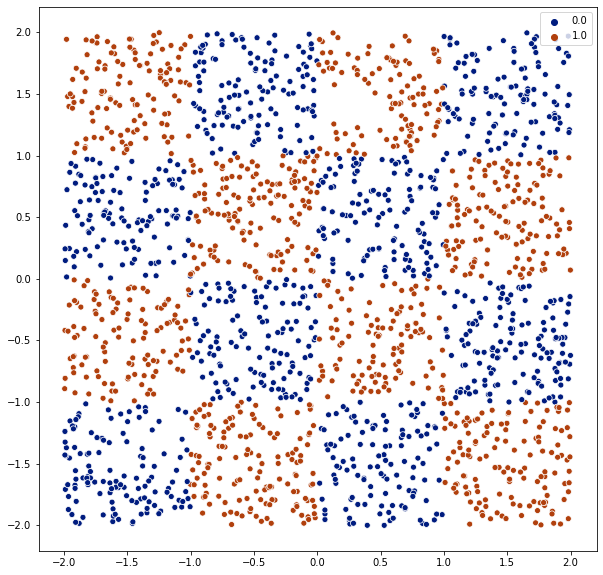

In [3]:
def gen_data(n_samples, size):
    X = np.random.uniform(low=-size/2, high=size/2, size=(n_samples, 2))
    y = np.sum(np.floor(X-size/2), axis=1)%2
    return X, y

X, y = gen_data(n_samples=2000, size=4)
plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0], X[:,1], hue=y, palette=sns.color_palette('dark', n_colors=2))

In [4]:
model = MLPClassifier(hidden_layer_sizes=(16,16,4,4))
model.fit(X, y)
model.score(*gen_data(2000, 4))

/Users/adamhood/.datalore/anaconda/envs/untitled/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7425

In [7]:
def plot_results(train_size, test_size, hidden_layer_sizes, size=2, grid=None):
    if not grid:
        grid = 100*size+1
    X_train, y_train = gen_data(train_size, size=size)
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    model.fit(X_train, y_train)
    
    coords = np.linspace(-size, size, grid)
    X1, X2 = np.meshgrid(coords, coords)
    y_pred = model.predict(np.c_[X1.reshape(-1), X2.reshape(-1)])
    plt.figure(figsize=(16,16))
    plt.contourf(X1, X2, y_pred.reshape((grid, grid)), alpha=0.4, cmap='Dark2')

    sns.scatterplot(X_train[:,0], X_train[:,1], 
                    hue=y_train, 
                    palette=sns.color_palette('dark', n_colors=2))
    
    # X_test, y_test = gen_data(test_size, size=size)

/Users/adamhood/.datalore/anaconda/envs/untitled/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


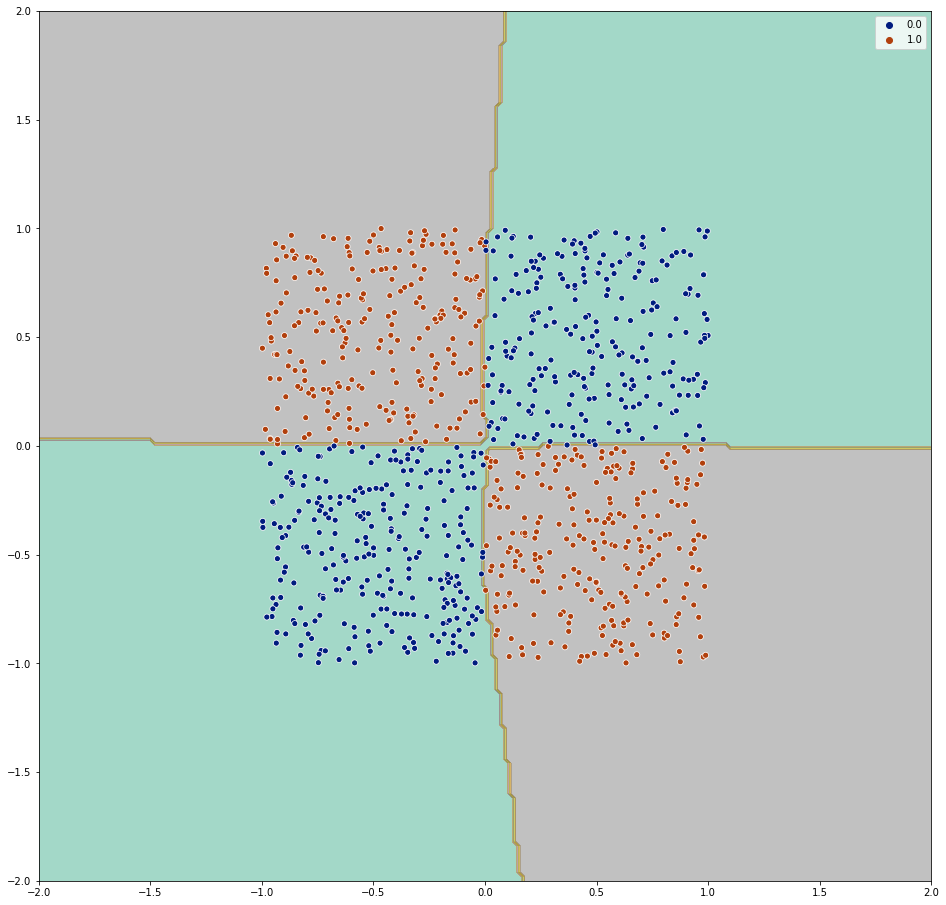

In [8]:
plot_results(1000, 1000, (16,16,4,4), size=2)


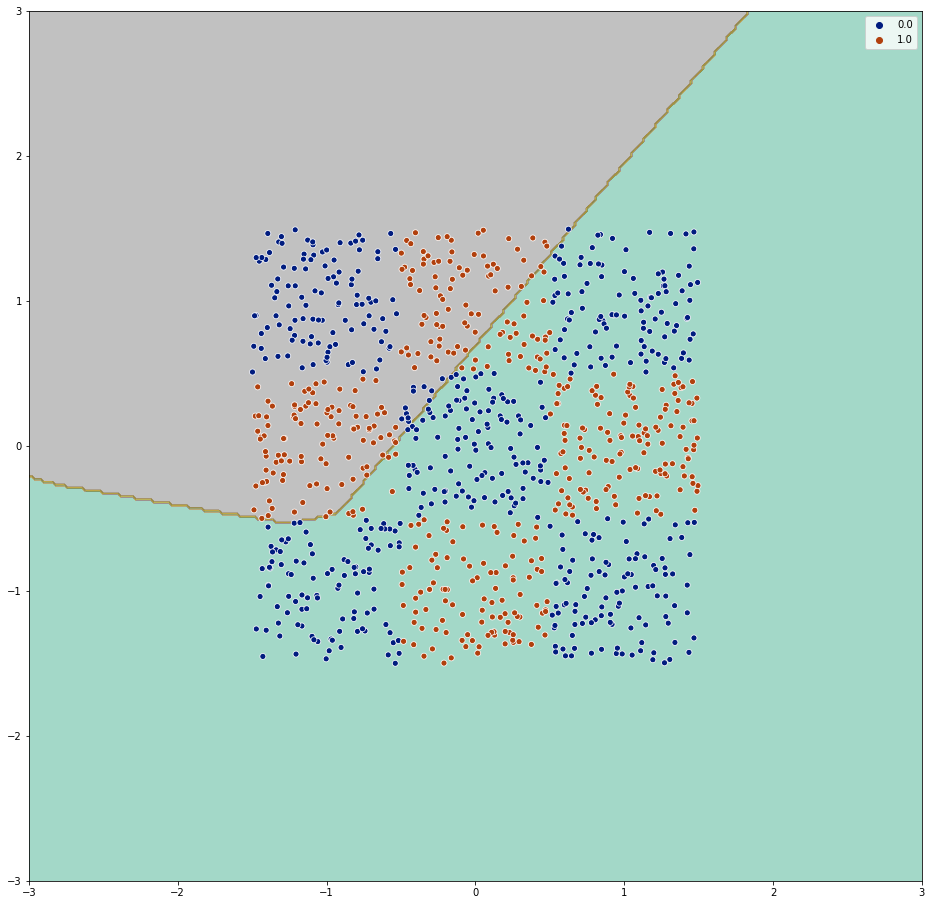

In [11]:
plot_results(1000, 1000, (4,4,4,4,4,4), size=3)